In [ ]:
import requests
import nltk
import numpy as np
import re
from nltk.corpus import stopwords
import random
import pandas as pd
from nltk.stem import *
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
pip install pdpipe

In [ ]:
def tokenizer(text):
    return word_tokenize(text)

In [ ]:
def case_fold(tokens):
    return [word.lower() for word in tokens]

In [ ]:
def remove_stopwords(tokens):
    cleaned = []
    for t in tokens:
        if re.match("^[a-zA-Z]+$", t) and t not in stopwords.words('english'):
            cleaned.append(t)
    return cleaned

In [ ]:
def stemming(tokens):
    ps = PorterStemmer()
    return [ps.stem(t) for t in tokens]

## Create dataframe sample

In [ ]:
books_df = pd.read_csv('books_df.csv')
df_40 = books_df.iloc[:40,:]
df_960 = books_df.iloc[960:,:]
df_sample = pd.concat([df_40, df_960])
df_sample

,Paragraphs,Label,Index
0,mme bonacieux knocked shutter three light regu...,a,1
1,dear dartagnan counsel give always lose seemed...,a,2
2,knob door noise de tr villes entrance turned r...,a,3
3,end eight days presented account appeared chos...,a,4
4,trust order go london added porthos money need...,a,5
...,...,...,...
995,broad flat mongolians red scarf swathed turban...,e,196
996,great god heaven earth whose tribunal thou per...,e,197
997,aside imprecation stepping forward tore palmet...,e,198
998,increase rancour beg observe brought entirely ...,e,199


In [ ]:
df_sample.iloc[:,0]

0      mme bonacieux knocked shutter three light regu...
1      dear dartagnan counsel give always lose seemed...
2      knob door noise de tr villes entrance turned r...
3      end eight days presented account appeared chos...
4      trust order go london added porthos money need...
                             ...                        
995    broad flat mongolians red scarf swathed turban...
996    great god heaven earth whose tribunal thou per...
997    aside imprecation stepping forward tore palmet...
998    increase rancour beg observe brought entirely ...
999    wings exclusion world less fortuitous liberty ...
Name: Paragraphs, Length: 80, dtype: object

In [ ]:
books_df.head()

,Paragraphs,Label,Index
0,mme bonacieux knocked shutter three light regu...,a,1
1,dear dartagnan counsel give always lose seemed...,a,2
2,knob door noise de tr villes entrance turned r...,a,3
3,end eight days presented account appeared chos...,a,4
4,trust order go london added porthos money need...,a,5


## BoW (1 gram)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
ngram1_vectorizer_obj = CountVectorizer(analyzer='word', ngram_range=(1, 1)) # , max_features=200
ngram1_vectorizer_model = ngram1_vectorizer_obj.fit_transform(books_df.iloc[:,0])
ngram1_vectorizer_names = ngram1_vectorizer_obj.get_feature_names()

In [ ]:
features1_df = pd.DataFrame(ngram1_vectorizer_model.toarray() ,columns = ngram1_vectorizer_names)
bag_of_word1= features1_df
bag_of_word1

,aback,abandon,abandoned,abandoning,abasement,abated,abatis,abb,abbess,abbey,abducted,abduction,abeam,abet,abhorred,abhorrent,abhors,abide,abiding,ability,abject,able,ablebodied,ablutions,ably,aboard,abode,abominable,aboutlord,aboveboard,abreast,abroad,abrupt,abruptly,absence,absent,absolute,absolutely,absorbed,abstract,...,youat,youd,youfive,youif,youin,youis,youll,youmore,young,younger,youngest,youof,youpardon,youre,yourgreatgrandmother,yoursnor,youso,yousold,youth,youthat,youthful,youve,youvery,zagged,zambesi,zanzibar,zeal,zealand,zealous,zealously,zenda,zendaon,zendathe,zest,zestfully,zigged,zip,zone,zoo,zu
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## BoW + 2gram

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
ngram_vectorizer_obj = CountVectorizer(analyzer='word', ngram_range=(2, 2), max_features=200) # , max_features=200
ngram_vectorizer_model = ngram_vectorizer_obj.fit_transform(books_df.iloc[:,0])
ngram_vectorizer_names = ngram_vectorizer_obj.get_feature_names()

In [ ]:
ngram_vectorizer_model.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
features_df = pd.DataFrame(ngram_vectorizer_model.toarray() ,columns = ngram_vectorizer_names)
bag_of_word2= features_df

In [ ]:
features_df_copy = features_df.copy()

In [ ]:
features_df_copy

,additional terms,ah said,antoinette de,archive foundation,asked dartagnan,athos porthos,based work,black michael,black stone,blue eyes,came back,captain blood,castle zenda,colonel bishop,colonel sapt,come back,copies project,copying distributing,copyright holder,copyright law,could find,could get,could hear,could see,cried dartagnan,dartagnan said,de cussy,de gautet,de mauban,de rivarol,de tr,de wardes,de winter,derivative works,distributing project,distribution project,dont know,dont think,duke buckingham,duke michael,...,sword hand,tarzan apes,ten minutes,terms agreement,terms project,thank god,thats true,thief pirate,things project,thirtynine steps,thousand pieces,three men,toward door,tr ville,tut tut,two days,two hours,two men,two three,united states,upon ground,von tarlenheim,waved hand,well said,went back,white man,within days,work work,would come,would go,would make,would take,wounded man,years ago,yes said,yes yes,young man,young men,young rupert,young woman
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
features_df_copy[features_df_copy > 0.5 ]

,additional terms,ah said,antoinette de,archive foundation,asked dartagnan,athos porthos,based work,black michael,black stone,blue eyes,came back,captain blood,castle zenda,colonel bishop,colonel sapt,come back,copies project,copying distributing,copyright holder,copyright law,could find,could get,could hear,could see,cried dartagnan,dartagnan said,de cussy,de gautet,de mauban,de rivarol,de tr,de wardes,de winter,derivative works,distributing project,distribution project,dont know,dont think,duke buckingham,duke michael,...,sword hand,tarzan apes,ten minutes,terms agreement,terms project,thank god,thats true,thief pirate,things project,thirtynine steps,thousand pieces,three men,toward door,tr ville,tut tut,two days,two hours,two men,two three,united states,upon ground,von tarlenheim,waved hand,well said,went back,white man,within days,work work,would come,would go,would make,would take,wounded man,years ago,yes said,yes yes,young man,young men,young rupert,young woman
0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [ ]:
features_df_copy.replace(0, "NAN")  #numpy.NAN
features_df_copy.head()

,additional terms,ah said,antoinette de,archive foundation,asked dartagnan,athos porthos,based work,black michael,black stone,blue eyes,came back,captain blood,castle zenda,colonel bishop,colonel sapt,come back,copies project,copying distributing,copyright holder,copyright law,could find,could get,could hear,could see,cried dartagnan,dartagnan said,de cussy,de gautet,de mauban,de rivarol,de tr,de wardes,de winter,derivative works,distributing project,distribution project,dont know,dont think,duke buckingham,duke michael,...,sword hand,tarzan apes,ten minutes,terms agreement,terms project,thank god,thats true,thief pirate,things project,thirtynine steps,thousand pieces,three men,toward door,tr ville,tut tut,two days,two hours,two men,two three,united states,upon ground,von tarlenheim,waved hand,well said,went back,white man,within days,work work,would come,would go,would make,would take,wounded man,years ago,yes said,yes yes,young man,young men,young rupert,young woman
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer 

In [ ]:
tfidf_obj = TfidfVectorizer()
tfidf_pickle = tfidf_obj.fit(books_df.iloc[:,0])
tfidf_model = tfidf_obj.fit_transform(books_df.iloc[:,0])
tfidf_obj_names = tfidf_obj.get_feature_names()


In [ ]:
tfidf_df1 = pd.DataFrame(tfidf_model.toarray(), columns=tfidf_obj_names)
tfidf_df1

,aback,abandon,abandoned,abandoning,abasement,abated,abatis,abb,abbess,abbey,abducted,abduction,abeam,abet,abhorred,abhorrent,abhors,abide,abiding,ability,abject,able,ablebodied,ablutions,ably,aboard,abode,abominable,aboutlord,aboveboard,abreast,abroad,abrupt,abruptly,absence,absent,absolute,absolutely,absorbed,abstract,...,youat,youd,youfive,youif,youin,youis,youll,youmore,young,younger,youngest,youof,youpardon,youre,yourgreatgrandmother,yoursnor,youso,yousold,youth,youthat,youthful,youve,youvery,zagged,zambesi,zanzibar,zeal,zealand,zealous,zealously,zenda,zendaon,zendathe,zest,zestfully,zigged,zip,zone,zoo,zu
0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.055561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.108448,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.19358,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.158575,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

## TF-IDF + ngram

In [ ]:
tfidf_obj = TfidfVectorizer(ngram_range=(2,2))
tfidf_pickle = tfidf_obj.fit(books_df.iloc[:,0])
tfidf_model = tfidf_obj.fit_transform(books_df.iloc[:,0])
tfidf_obj_names = tfidf_obj.get_feature_names()
tfidf_df2 = pd.DataFrame(tfidf_model.toarray(), columns=tfidf_obj_names)

## Modeling

In [ ]:
books_df

,Paragraphs,Label,Index
0,mme bonacieux knocked shutter three light regu...,a,1
1,dear dartagnan counsel give always lose seemed...,a,2
2,knob door noise de tr villes entrance turned r...,a,3
3,end eight days presented account appeared chos...,a,4
4,trust order go london added porthos money need...,a,5
...,...,...,...
995,broad flat mongolians red scarf swathed turban...,e,196
996,great god heaven earth whose tribunal thou per...,e,197
997,aside imprecation stepping forward tore palmet...,e,198
998,increase rancour beg observe brought entirely ...,e,199


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tfidf_df1, books_df['Label'], random_state=7)


In [ ]:
tfidf_df1.shape

(1000, 14515)

In [ ]:
X_train.shape

(750, 14515)

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report,confusion_matrix

#### BoW + 2grams

In [ ]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)
y_pred = naive_bayes.predict(X_test)

In [ ]:
#y_pred

In [ ]:
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print('Accuracy of model: {:.2f}%'.format(naive_bayes.score(X_test, y_test)*100))
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[42  1  1  0  0]
 [ 0 43  5  1  0]
 [ 0  2 44  0  0]
 [ 0  1  3 53  0]
 [ 1  0  0  0 53]]
Accuracy of model: 94.00%
Classification Report:
               precision    recall  f1-score   support

           a       0.98      0.95      0.97        44
           b       0.91      0.88      0.90        49
           c       0.83      0.96      0.89        46
           d       0.98      0.93      0.95        57
           e       1.00      0.98      0.99        54

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250



#### TF-IDF

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_df1, books_df['Label'], random_state=7)

In [ ]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)
y_pred = naive_bayes.predict(X_test)

Confusion Matrix:
 [[42  1  1  0  0]
 [ 0 43  5  1  0]
 [ 0  2 44  0  0]
 [ 0  1  3 53  0]
 [ 1  0  0  0 53]]
Accuracy of model: 94.00%
Classification Report:
               precision    recall  f1-score   support

           a       0.98      0.95      0.97        44
           b       0.91      0.88      0.90        49
           c       0.83      0.96      0.89        46
           d       0.98      0.93      0.95        57
           e       1.00      0.98      0.99        54

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250



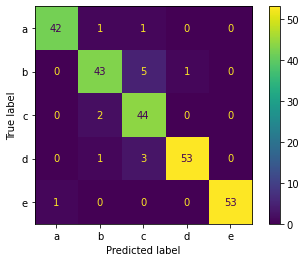

In [ ]:
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
plot_confusion_matrix(naive_bayes,X_test ,y_test)
#plt.show()
print('Accuracy of model: {:.2f}%'.format(naive_bayes.score(X_test, y_test)*100))
print("Classification Report:\n",classification_report(y_test, y_pred))

In [ ]:
from sklearn import tree

def tree_m(docs ):
  X_train,X_test,y_train,y_test = train_test_split(docs, books_df['Label'], random_state=7)
  clf = tree.DecisionTreeClassifier()
  clf = clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
  plot_confusion_matrix(clf,X_test ,y_test)
  print('Accuracy of model: {:.2f}%'.format(clf.score(X_test, y_test)*100))
  print("Classification Report:\n",classification_report(y_test, y_pred))  


Confusion Matrix:
 [[32  6  5  1  0]
 [ 2 40  4  1  2]
 [ 1  1 37  4  3]
 [10  2  9 35  1]
 [ 1  2  5  0 46]]
Accuracy of model: 76.00%
Classification Report:
               precision    recall  f1-score   support

           a       0.70      0.73      0.71        44
           b       0.78      0.82      0.80        49
           c       0.62      0.80      0.70        46
           d       0.85      0.61      0.71        57
           e       0.88      0.85      0.87        54

    accuracy                           0.76       250
   macro avg       0.77      0.76      0.76       250
weighted avg       0.78      0.76      0.76       250



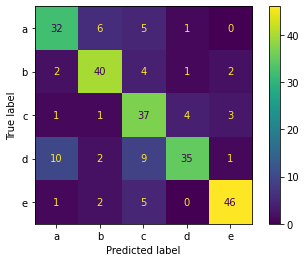

In [ ]:
tree_m(tfidf_df1 )

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

def Knn_p(documents):
  
  X_train,X_test,y_train , y_test =train_test_split(documents, books_df['Label'], random_state=7)
  neigh = KNeighborsClassifier(n_neighbors=3)
  neigh.fit(X_train, y_train)
  y_pred = neigh.predict(X_test)
  print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
  plot_confusion_matrix(neigh,X_test ,y_test)
  print('Accuracy of model: {:.2f}%'.format(neigh.score(X_test, y_test)*100))
  print("Classification Report:\n",classification_report(y_test, y_pred))


Confusion Matrix:
 [[42  2  0  0  0]
 [ 0 43  5  1  0]
 [ 0  5 38  3  0]
 [ 1  1  2 53  0]
 [ 1  0  0  0 53]]
Accuracy of model: 91.60%
Classification Report:
               precision    recall  f1-score   support

           a       0.95      0.95      0.95        44
           b       0.84      0.88      0.86        49
           c       0.84      0.83      0.84        46
           d       0.93      0.93      0.93        57
           e       1.00      0.98      0.99        54

    accuracy                           0.92       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.92      0.92      0.92       250



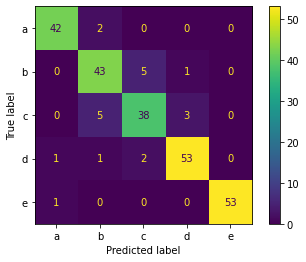

In [ ]:
Knn_p(tfidf_df1)

### SVM

In [ ]:
from sklearn.svm import SVC

def svm_prediction(documents ):

  X_train,X_test,y_train , y_test = train_test_split(documents, books_df['Label'], random_state=7)
  clf = SVC()
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
  plot_confusion_matrix(clf,X_test ,y_test)
  print('Accuracy of model: {:.2f}%'.format(clf.score(X_test, y_test)*100))
  print("Classification Report:\n",classification_report(y_test, y_pred))



Confusion Matrix:
 [[39  2  2  0  1]
 [ 0 42  7  0  0]
 [ 0  2 43  1  0]
 [ 0  2  4 51  0]
 [ 0  0  0  0 54]]
Accuracy of model: 91.60%
Classification Report:
               precision    recall  f1-score   support

           a       1.00      0.89      0.94        44
           b       0.88      0.86      0.87        49
           c       0.77      0.93      0.84        46
           d       0.98      0.89      0.94        57
           e       0.98      1.00      0.99        54

    accuracy                           0.92       250
   macro avg       0.92      0.91      0.92       250
weighted avg       0.92      0.92      0.92       250



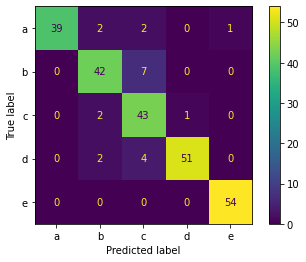

In [ ]:
svm_prediction(tfidf_df1)

# **TF-IDF 2 ngram **

Confusion Matrix:
 [[24  2  3  2 13]
 [ 1 26  3  3 16]
 [ 2  2 24  1 17]
 [ 1  1  7 36 12]
 [ 0  0  1  0 53]]
Accuracy of model: 65.20%
Classification Report:
               precision    recall  f1-score   support

           a       0.86      0.55      0.67        44
           b       0.84      0.53      0.65        49
           c       0.63      0.52      0.57        46
           d       0.86      0.63      0.73        57
           e       0.48      0.98      0.64        54

    accuracy                           0.65       250
   macro avg       0.73      0.64      0.65       250
weighted avg       0.73      0.65      0.65       250



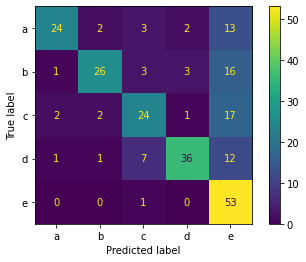

In [ ]:
#use decision tree with TF- IDF
tree_m(tfidf_df2)

Confusion Matrix:
 [[39  4  0  0  1]
 [ 3 37  5  1  3]
 [ 5  8 29  1  3]
 [ 5  7  4 37  4]
 [ 0  1  0  0 53]]
Accuracy of model: 78.00%
Classification Report:
               precision    recall  f1-score   support

           a       0.75      0.89      0.81        44
           b       0.65      0.76      0.70        49
           c       0.76      0.63      0.69        46
           d       0.95      0.65      0.77        57
           e       0.83      0.98      0.90        54

    accuracy                           0.78       250
   macro avg       0.79      0.78      0.77       250
weighted avg       0.79      0.78      0.78       250



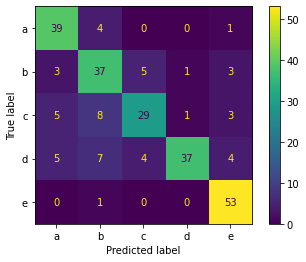

In [ ]:
Knn_p(tfidf_df2)

Confusion Matrix:
 [[36  1  7  0  0]
 [ 1  6 41  1  0]
 [ 0  3 43  0  0]
 [ 4  1 51  0  1]
 [ 1  0 42  0 11]]
Accuracy of model: 38.40%
Classification Report:
               precision    recall  f1-score   support

           a       0.86      0.82      0.84        44
           b       0.55      0.12      0.20        49
           c       0.23      0.93      0.37        46
           d       0.00      0.00      0.00        57
           e       0.92      0.20      0.33        54

    accuracy                           0.38       250
   macro avg       0.51      0.42      0.35       250
weighted avg       0.50      0.38      0.33       250



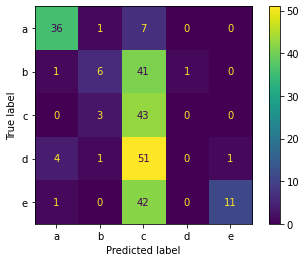

In [ ]:
svm_prediction(tfidf_df2)

# BOW 1 gram 

dicesion tree with BOW 1


In [ ]:
tree_m(bag_of_word1)


KNN with BOW 1


Confusion Matrix:
 [[11  1 32  0  0]
 [ 0  6 43  0  0]
 [ 0  4 42  0  0]
 [ 1  1 44 11  0]
 [ 0  0 50  0  4]]
Accuracy of model: 29.60%
Classification Report:
               precision    recall  f1-score   support

           a       0.92      0.25      0.39        44
           b       0.50      0.12      0.20        49
           c       0.20      0.91      0.33        46
           d       1.00      0.19      0.32        57
           e       1.00      0.07      0.14        54

    accuracy                           0.30       250
   macro avg       0.72      0.31      0.28       250
weighted avg       0.74      0.30      0.27       250



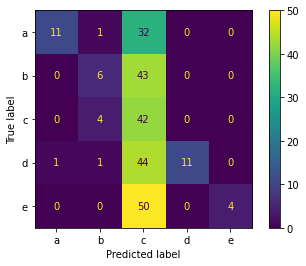

In [ ]:
Knn_p(bag_of_word1)

SVM with BOW 1

Confusion Matrix:
 [[40  3  1  0  0]
 [ 0 44  3  2  0]
 [ 0  4 42  0  0]
 [ 0  2  6 49  0]
 [ 0  0  0  0 54]]
Accuracy of model: 91.60%
Classification Report:
               precision    recall  f1-score   support

           a       1.00      0.91      0.95        44
           b       0.83      0.90      0.86        49
           c       0.81      0.91      0.86        46
           d       0.96      0.86      0.91        57
           e       1.00      1.00      1.00        54

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250



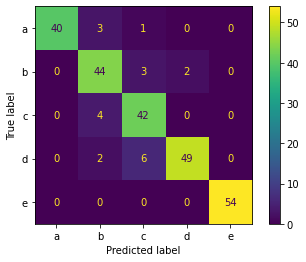

In [ ]:
svm_prediction(bag_of_word1)

**# BOW 2 gram **

Confusion Matrix:
 [[24  9  4  3  4]
 [ 0 39  6  4  0]
 [ 2 12 25  3  4]
 [ 2 10  5 39  1]
 [ 0  8  2  0 44]]
Accuracy of model: 68.40%
Classification Report:
               precision    recall  f1-score   support

           a       0.86      0.55      0.67        44
           b       0.50      0.80      0.61        49
           c       0.60      0.54      0.57        46
           d       0.80      0.68      0.74        57
           e       0.83      0.81      0.82        54

    accuracy                           0.68       250
   macro avg       0.72      0.68      0.68       250
weighted avg       0.72      0.68      0.69       250



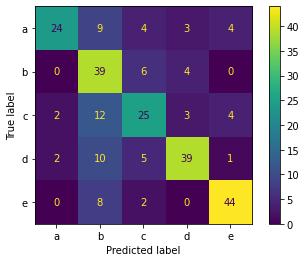

In [ ]:
# bag_of_word2
# dicession tree  predection of bag of word 2ngram 

tree_m(bag_of_word2)


Confusion Matrix:
 [[28 12  4  0  0]
 [ 1 37  9  2  0]
 [ 6 18 19  1  2]
 [ 8 14 14 21  0]
 [ 2  9  2  0 41]]
Accuracy of model: 58.40%
Classification Report:
               precision    recall  f1-score   support

           a       0.62      0.64      0.63        44
           b       0.41      0.76      0.53        49
           c       0.40      0.41      0.40        46
           d       0.88      0.37      0.52        57
           e       0.95      0.76      0.85        54

    accuracy                           0.58       250
   macro avg       0.65      0.59      0.59       250
weighted avg       0.67      0.58      0.59       250



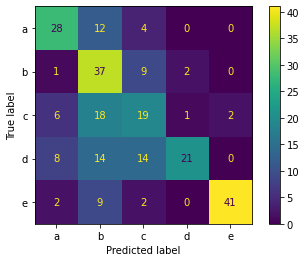

In [ ]:
# knn predection of bag of word 2ngram 
Knn_p(bag_of_word2)

Confusion Matrix:
 [[29  3 11  1  0]
 [ 3 25 16  5  0]
 [ 4  2 40  0  0]
 [ 3  4 14 35  1]
 [ 1  2  9  1 41]]
Accuracy of model: 68.00%
Classification Report:
               precision    recall  f1-score   support

           a       0.72      0.66      0.69        44
           b       0.69      0.51      0.59        49
           c       0.44      0.87      0.59        46
           d       0.83      0.61      0.71        57
           e       0.98      0.76      0.85        54

    accuracy                           0.68       250
   macro avg       0.73      0.68      0.69       250
weighted avg       0.75      0.68      0.69       250



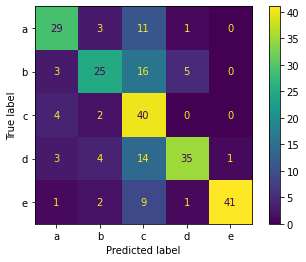

In [ ]:
# SVM  predection of bag of word 2ngram 
svm_prediction(bag_of_word2)

## Stemming

In [ ]:
books_df_copy = books_df.copy()

In [ ]:
import pdpipe as pdp

In [ ]:
books_df_copy["paragraphs_stemmed_list"] = books_df_copy["Paragraphs"].apply(lambda x: x[1:-1].split(','))
stemming = pdp.SnowballStem('EnglishStemmer', 'paragraphs_stemmed_list')
stemming(books_df_copy)
books_df_copy['paragraphs_stemmed'] = [','.join(map(str, l)) for l in books_df_copy['paragraphs_stemmed_list']]

In [ ]:
books_df_copy.head()

,Paragraphs,Label,Index,paragraphs_stemmed_list,paragraphs_stemmed
0,mme bonacieux knocked shutter three light regu...,a,1,[me bonacieux knocked shutter three light regu...,me bonacieux knocked shutter three light regul...
1,dear dartagnan counsel give always lose seemed...,a,2,[ear dartagnan counsel give always lose seemed...,ear dartagnan counsel give always lose seemed ...
2,knob door noise de tr villes entrance turned r...,a,3,[nob door noise de tr villes entrance turned r...,nob door noise de tr villes entrance turned ro...
3,end eight days presented account appeared chos...,a,4,[nd eight days presented account appeared chos...,nd eight days presented account appeared chose...
4,trust order go london added porthos money need...,a,5,[rust order go london added porthos money need...,rust order go london added porthos money neede...


In [ ]:
tfidf_obj_stem = TfidfVectorizer()
tfidf_stem = tfidf_obj_stem.fit(books_df_copy.iloc[:,4])
tfidf_model_stem = tfidf_stem.fit_transform(books_df_copy.iloc[:,4])
tfidf_obj_names_stem = tfidf_obj_stem.get_feature_names()
tfidf_df1_stem = pd.DataFrame(tfidf_model_stem.toarray(), columns=tfidf_obj_names_stem)

Confusion Matrix:
 [[42  2  0  0  0]
 [ 1 43  4  1  0]
 [ 1  5 38  2  0]
 [ 1  1  2 53  0]
 [ 1  0  0  0 53]]
Accuracy of model: 91.60%
Classification Report:
               precision    recall  f1-score   support

           a       0.91      0.95      0.93        44
           b       0.84      0.88      0.86        49
           c       0.86      0.83      0.84        46
           d       0.95      0.93      0.94        57
           e       1.00      0.98      0.99        54

    accuracy                           0.92       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.92      0.92      0.92       250



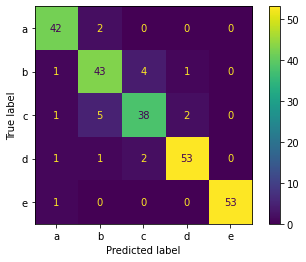

In [ ]:
Knn_p(tfidf_df1_stem)

Confusion Matrix:
 [[33  5  1  1  4]
 [ 3 41  3  0  2]
 [ 1  3 39  1  2]
 [ 7  5  7 37  1]
 [ 1  5  3  0 45]]
Accuracy of model: 78.00%
Classification Report:
               precision    recall  f1-score   support

           a       0.73      0.75      0.74        44
           b       0.69      0.84      0.76        49
           c       0.74      0.85      0.79        46
           d       0.95      0.65      0.77        57
           e       0.83      0.83      0.83        54

    accuracy                           0.78       250
   macro avg       0.79      0.78      0.78       250
weighted avg       0.80      0.78      0.78       250



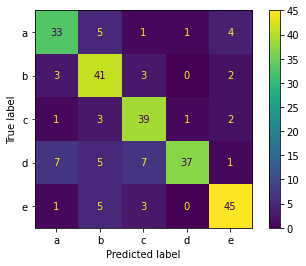

In [ ]:
tree_m(tfidf_df1_stem)


Confusion Matrix:
 [[39  2  2  0  1]
 [ 0 42  7  0  0]
 [ 0  3 43  0  0]
 [ 0  2  4 51  0]
 [ 0  0  1  0 53]]
Accuracy of model: 91.20%
Classification Report:
               precision    recall  f1-score   support

           a       1.00      0.89      0.94        44
           b       0.86      0.86      0.86        49
           c       0.75      0.93      0.83        46
           d       1.00      0.89      0.94        57
           e       0.98      0.98      0.98        54

    accuracy                           0.91       250
   macro avg       0.92      0.91      0.91       250
weighted avg       0.92      0.91      0.91       250



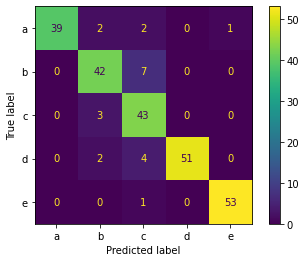

In [ ]:
svm_prediction(tfidf_df1_stem)

Confusion Matrix:
 [[42  2  0  0  0]
 [ 1 43  4  1  0]
 [ 1  5 38  2  0]
 [ 1  1  2 53  0]
 [ 1  0  0  0 53]]
Accuracy of model: 91.60%
Classification Report:
               precision    recall  f1-score   support

           a       0.91      0.95      0.93        44
           b       0.84      0.88      0.86        49
           c       0.86      0.83      0.84        46
           d       0.95      0.93      0.94        57
           e       1.00      0.98      0.99        54

    accuracy                           0.92       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.92      0.92      0.92       250



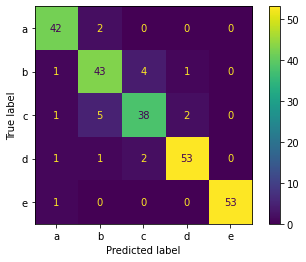

In [ ]:
Knn_p(tfidf_df1_stem)

**The accuracy increased from 78% to 91%**

Confusion Matrix:
 [[39  2  2  0  1]
 [ 0 42  7  0  0]
 [ 0  3 43  0  0]
 [ 0  2  4 51  0]
 [ 0  0  1  0 53]]
Accuracy of model: 91.20%
Classification Report:
               precision    recall  f1-score   support

           a       1.00      0.89      0.94        44
           b       0.86      0.86      0.86        49
           c       0.75      0.93      0.83        46
           d       1.00      0.89      0.94        57
           e       0.98      0.98      0.98        54

    accuracy                           0.91       250
   macro avg       0.92      0.91      0.91       250
weighted avg       0.92      0.91      0.91       250



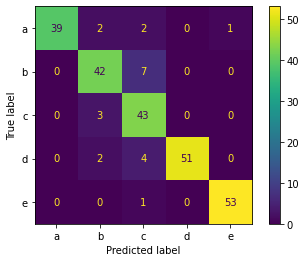

In [ ]:
svm_prediction(tfidf_df1_stem)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
ngram1_vectorizer_obj_stem = CountVectorizer(analyzer='word', ngram_range=(1, 1)) # , max_features=200
ngram1_vectorizer_model_stem = ngram1_vectorizer_obj_stem.fit_transform(books_df_copy.iloc[:,4])
ngram1_vectorizer_names_stem = ngram1_vectorizer_obj_stem.get_feature_names()
features1_df_stem = pd.DataFrame(ngram1_vectorizer_model.toarray() ,columns = ngram1_vectorizer_names)
bag_of_word1_stem= features1_df_stem


Confusion Matrix:
 [[32  4  3  2  3]
 [ 2 39  5  2  1]
 [ 2  1 40  1  2]
 [10  5  5 34  3]
 [ 0  1  4  1 48]]
Accuracy of model: 77.20%
Classification Report:
               precision    recall  f1-score   support

           a       0.70      0.73      0.71        44
           b       0.78      0.80      0.79        49
           c       0.70      0.87      0.78        46
           d       0.85      0.60      0.70        57
           e       0.84      0.89      0.86        54

    accuracy                           0.77       250
   macro avg       0.77      0.78      0.77       250
weighted avg       0.78      0.77      0.77       250



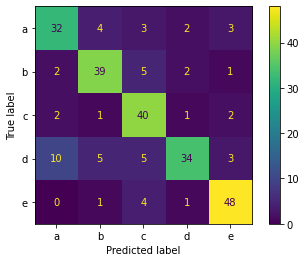

In [ ]:
tree_m(bag_of_word1_stem)


Confusion Matrix:
 [[11  1 32  0  0]
 [ 0  6 43  0  0]
 [ 0  4 42  0  0]
 [ 1  1 44 11  0]
 [ 0  0 50  0  4]]
Accuracy of model: 29.60%
Classification Report:
               precision    recall  f1-score   support

           a       0.92      0.25      0.39        44
           b       0.50      0.12      0.20        49
           c       0.20      0.91      0.33        46
           d       1.00      0.19      0.32        57
           e       1.00      0.07      0.14        54

    accuracy                           0.30       250
   macro avg       0.72      0.31      0.28       250
weighted avg       0.74      0.30      0.27       250



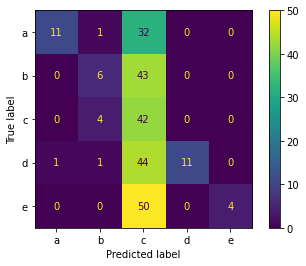

In [ ]:
Knn_p(bag_of_word1_stem)

Confusion Matrix:
 [[40  3  1  0  0]
 [ 0 44  3  2  0]
 [ 0  4 42  0  0]
 [ 0  2  6 49  0]
 [ 0  0  0  0 54]]
Accuracy of model: 91.60%
Classification Report:
               precision    recall  f1-score   support

           a       1.00      0.91      0.95        44
           b       0.83      0.90      0.86        49
           c       0.81      0.91      0.86        46
           d       0.96      0.86      0.91        57
           e       1.00      1.00      1.00        54

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250



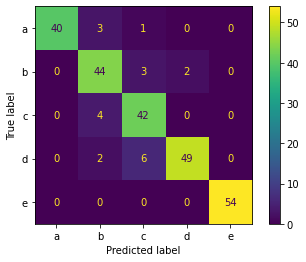

In [ ]:
svm_prediction(bag_of_word1_stem) 

In [ ]:
tfidf_obj = TfidfVectorizer(ngram_range=(2,2))
tfidf_pickle = tfidf_obj.fit(books_df.iloc[:,0])
tfidf_model = tfidf_obj.fit_transform(books_df.iloc[:,0])
tfidf_obj_names = tfidf_obj.get_feature_names()
tfidf_df2 = pd.DataFrame(tfidf_model.toarray(), columns=tfidf_obj_names)

## Cross-Validation

In [ ]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)
y_pred = naive_bayes.predict(X_test)

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
kf = KFold(n_splits=10, random_state=None, shuffle=False)
s = 0
scores = [] 
for traincv, testcv in kf.split(train_set):
    classifier = nltk.NaiveBayesClassifier.train(train_set[traincv[0]:traincv[len(traincv)-1]])
    score = nltk.classify.util.accuracy(classifier, train_set[testcv[0]:testcv[len(testcv)-1]])
    scores.append(score)
    print()
    print ('accuracy:', score)
print('Mean Scores for Cross validation: ', np.mean(scores))

In [ ]:
cross_valid()

In [ ]:
def cross_valid(featuresets, model_obj, k=10):
    s = 0
    scores = []

    for i in range(len(featuresets)//k,len(featuresets),len(featuresets)//k):
        valid = featuresets[s:i]
        train = featuresets[0:s] + featuresets[i:]
        classifier = model_obj.train(train)
        score = nltk.classify.util.accuracy(classifier, valid)
        print('accuracy-Train:', score)
        scores.append(score)
        print()
        s = i
    print('Mean Scores for Cross validation: ', np.mean(scores))

In [ ]:
def svm_prediction_cv(documents ):

  X_train,X_test,y_train , y_test = train_test_split(documents, books_df['Label'], random_state=7)
  clf = SVC()
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
  plot_confusion_matrix(clf,X_test ,y_test)
  print('Accuracy of model: {:.2f}%'.format(clf.score(X_test, y_test)*100))
  print("Classification Report:\n",classification_report(y_test, y_pred))
  cross_valid(documents, clf)

Confusion Matrix:
 [[107   0   3   1   3]
 [  0 105  12   1   5]
 [  0   3 111   2   1]
 [  0   1  22 105   2]
 [  0   0   2   0 114]]
Accuracy of model: 90.33%
Classification Report:
               precision    recall  f1-score   support

           a       1.00      0.94      0.97       114
           b       0.96      0.85      0.91       123
           c       0.74      0.95      0.83       117
           d       0.96      0.81      0.88       130
           e       0.91      0.98      0.95       116

    accuracy                           0.90       600
   macro avg       0.92      0.91      0.91       600
weighted avg       0.92      0.90      0.90       600



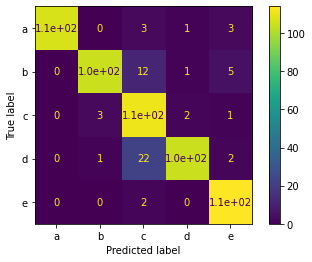

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_df1, books_df['Label'], random_state=7, test_size=0.4)


def svm_prediction(documents):

  X_train,X_test,y_train , y_test = train_test_split(documents, books_df['Label'], random_state=7, test_size=0.6)
  clf = SVC()
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
  plot_confusion_matrix(clf,X_test ,y_test)
  print('Accuracy of model: {:.2f}%'.format(clf.score(X_test, y_test)*100))
  print("Classification Report:\n",classification_report(y_test, y_pred))

svm_prediction(tfidf_df1)

## **Online App**

In [ ]:
import pickle

models = {
    'model':clf,
    'tfidf': tfidf_pickle
}
filename = 'finalized_model.sav'
pickle.dump(models, open(filename, 'wb'))



In [ ]:
from flask import Flask, jsonify, request, render_template
from sklearn import model_selection, preprocessing, linear_model
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
app = Flask(__name__)


filename = 'finalized_model.sav'
# load the model from disk
models = pickle.load(open(filename, 'rb'))

loaded_model = models['model']
verctor_count = models['tfidf'] 

class_names = {'a': 'book 1','b': 'book 2','c': 'book 3','d': 'book 4','e': 'book 5'}

@app.route('/<string:name>')
def home1(name):
    return class_names[loaded_model.predict(verctor_count.transform([name]))[0]]


In [ ]:
app.run(port=5000)
